# Project 2

Joseph Tiu
October 19, 2021

In this lab, we will be looking at methods used to computationally analyze airfoils. We will first start by modelling an airfoil using potential flows, sources and sinks.

### Problem 1: Freestream/Source Superposition
In this problem, we will be looking at the potential flow superposition method as discussed in class. We will start by first deriving the equations and simulating the superposition using Python.

#### 1.1 Superposition Plot
Given the superposition of a Uniform (free)stream and a Source, we want to find an equation for the stagnation point and the dividing streamline. The dividing streamline can be treated as a solid surface since no flow passes the streamline and this streamline can be found through the stagnation point. We are given Equation 3.75 from Anderson's book which is shown below:

$$\psi = V_\infty r\sin\theta + \frac{\Lambda}{2\pi}\theta = \text{const.}$$

Using the stream function ($\psi$), we can derive the velocity in polar coordinates, $V_r$ and $V_\theta$ as follows:

$$V_r = \frac{1}{r} \frac{\partial\psi}{\partial\theta} = V_\infty \cos\theta + \frac{\Lambda}{2\pi r}$$
$$V_\theta = -\frac{\partial\psi}{\partial r} = -V_\infty \sin \theta$$

The dividing streamline coincides with the stagnation point such that finding the stagnation point can give us the stream function value at that point, which can give us an expression for the stream line. The stagnation point is defined as the point where the stream velocity is equal to zero, or where each component of velocity is equal to zero:

$$V_\infty \cos\theta + \frac{\Lambda}{2\pi r} = 0$$
$$-V_\infty \sin \theta = 0$$

In order to satisfy the latter equation, it is clear that $\theta$ has to be equal to $n\pi$, where $n$ is an integer including zero. Based on the figure given in the problem statement (stagnation point to the left of source), we can assume $\theta = \pi$ which gives us the following equations:

$$V_\infty \cos\pi + \frac{\Lambda}{2\pi r} = 0 \longrightarrow V_\infty \cos\pi = -\frac{\Lambda}{2\pi r}$$
$$-V_\infty \sin \pi = 0 \longrightarrow 0 = 0$$

We know that $\cos\pi$ is equal to negative one, so that gives us a simpler equation where we can solve for $r$ based on given values:

$$-V_\infty = -\frac{\Lambda}{2\pi r} \longrightarrow r = \frac{\Lambda}{2\pi V_\infty}$$

This gives us a stagnation point at the polar coordinates ($\frac{\Lambda}{2\pi V_\infty}$, $\pi$). We can plug these values back in to our stream function to get the value of the stream function at the stagnation point:

$$\psi_{stag} = V_\infty \frac{\Lambda}{2\pi V_\infty}\sin\pi + \frac{\Lambda}{2\pi}\pi = \frac{\Lambda}{2} = \text{const.}$$

In order to get an expression for the dividing streamline, we can set the stream function equal to the constant $\frac{\Lambda}{2}$ as shown below:

$$\psi_{DSL} = V_\infty r\sin\theta + \frac{\Lambda}{2\pi}\theta = \frac{\Lambda}{2} \longrightarrow r = \frac{\Lambda}{2V_\infty\sin\theta} \left( 1-\frac{\theta}{\pi} \right)$$

This gives us $r$ as a function of $\theta$ for the dividing streamline. We can simulate and plot this in Python by following the AeroPython Tutorial made by Lorena Barba. Below is a set of code that will plot the streamlines for a single source and sink.

We can apply the principle of superposition to plot both the Stream Function and Velocity Potential Function, $\psi$ and $\phi$. As for the diameter of the dividing streamline, we can use the last derived equation and plug in $\theta = \frac{\pi}{2}$ giving us the following for the dividing streamline radius:

$$r = \frac{\Lambda}{2V_\infty\sin\frac{\pi}{2}} \left( 1-\frac{\frac{\pi}{2}}{\pi} \right) = \frac{\Lambda}{2V_\infty} \left( 1-\frac{1}{2} \right) = \frac{\Lambda}{4V_\infty}$$

Doubling the radius gives us the diameter as a function of source strength and freestream velocity:

$$D = 2\frac{\Lambda}{4V_\infty} = \frac{\Lambda}{2V_\infty}$$

Text(-1.7305164769729844, -0.8, 'Stag. Point')

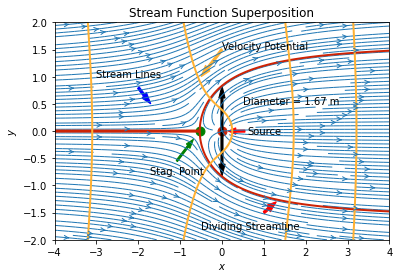

In [2]:
#Importing necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

#Creating a 200 x 200 grid in the xy-plane with specified start and end points
N = 200
xBounds = [-4, 4]
yBounds = [-2, 2]
x = np.linspace(xBounds[0], xBounds[1], N)
y = np.linspace(yBounds[0], yBounds[1], N)
X, Y = np.meshgrid(x, y)

#Function that calculates relevant freestream values from a given freestream strength and the mesh grid
def get_freestream_values(V_inf, X, Y, N):
    u = V_inf * np.ones((N, N), dtype=float)
    v = np.zeros((N, N), dtype=float)
    psi = V_inf * Y
    phi = V_inf * X

    return u, v, psi, phi

#Define the freestream strength (horizontal) and get the values using the defined function
V_inf = 0.6

u_inf, v_inf, psi_inf, phi_inf = get_freestream_values(V_inf, X, Y, N)

#Define functions that gets the singularity velocity, stream function and velocity potential
def get_singularity_velocity(Lambda, x_source, y_source, X_grid, Y_grid):
    #u and v are based on derived equations in the xy-plane
    u = (Lambda/(2*np.pi)) * (X_grid-x_source)/((X_grid-x_source)**2 + (Y_grid-y_source)**2)
    v = (Lambda/(2*np.pi)) * (Y_grid-y_source)/((X_grid-x_source)**2 + (Y_grid-y_source)**2)

    return u, v

def get_singularity_streamfunction(Lambda, x_source, y_source, X_grid, Y_grid):
    #psi is based on derived equations in the xy-plane
    psi = (Lambda/(2*np.pi)) * np.arctan2((Y_grid-y_source), (X_grid-x_source))

    return psi

def get_singularity_velocitypotential(Lambda, x_source, y_source, X_grid, Y_grid):
    #phi is based on derived equations in the xy-plane
    phi = (Lambda/(2*np.pi)) * np.log(np.sqrt((X_grid-x_source)**2 + (Y_grid-y_source)**2))

    return phi

#Create a source at the origin with strength of 2
source_strength = 2
source_x, source_y = 0, 0

#Use the defined functions to calculate u, v, psi and phi
u_source, v_source = get_singularity_velocity(source_strength, source_x, source_y, X, Y)
psi_source = get_singularity_streamfunction(source_strength, source_x, source_y, X, Y)
phi_source = get_singularity_velocitypotential(source_strength, source_x, source_y, X, Y)

#Add up the freestream and source values to get the total values
u_total = u_inf + u_source
v_total = v_inf + v_source
psi_total = psi_inf + psi_source
phi_total = phi_inf + phi_source

#Calculate the stagnation point using the derived equations
x_stag = source_x - source_strength/(2*np.pi*V_inf)
y_stag = source_y

#Create a streamline plot using u and v values
plt.streamplot(X, Y, u_total, v_total, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.arrow(-2, 0.8, 0.3, -0.3, width=0.05, length_includes_head=True, color="b")
plt.text(-3, 1, "Stream Lines")

plt.title("Stream Function Superposition")
plt.xlabel("$x$")
plt.ylabel("$y$")

#Create a contour using psi that follows the lambda/2 line (needs to also follow -lambda/2 for the bottom side)
streamConst = [-source_strength / 2, source_strength / 2]
plt.contour(X, Y, psi_total, levels=streamConst, colors='#CD2305', linewidths=2, linestyles='solid');
plt.arrow(1, -1.5, 0.3, 0.2, width=0.05, length_includes_head=True, color="r")
plt.text(-0.5, -1.8, "Dividing Streamline")

#Create contours of the velocity potential using phi and arbitrary values
plt.contour(X, Y, phi_total, levels=[-1.5, -0.3, 1.2, 2.3], colors='#FFB133', linewidths=2, linestyles='solid');
plt.arrow(source_x, source_y + 1.5, -0.5, -0.5, width=0.05, length_includes_head=True, color="#FFB133")
plt.text(source_x, source_y + 1.5, "Velocity Potential")

#Solve for the dividing streamline radius and plot this using arrows
dividingSL_Radius = source_strength/(4*V_inf)
plt.arrow(source_x, source_y, 0, dividingSL_Radius, width=0.05, length_includes_head=True, color="black")
plt.arrow(source_x, source_y, 0, -dividingSL_Radius, width=0.05, length_includes_head=True, color="black")
plt.text(source_x + 0.5, source_y + 0.5, "Diameter = {:.2f} m".format(dividingSL_Radius*2))

#Plot the source and stagnation points
plt.scatter(source_x, source_y, color="#CD2305", s=80, marker='o')
plt.arrow(source_x + 0.55, source_y, -0.4, 0, width=0.04, length_includes_head=True, color="red")
plt.text(source_x + 0.6, source_y -0.05, "Source")

plt.scatter(x_stag, y_stag, color='g', s=80, marker='o')
plt.arrow(x_stag - 0.55, y_stag- 0.55, 0.4,  0.4, width=0.04, length_includes_head=True, color="g")
plt.text(x_stag - 1.2, y_stag -0.8, "Stag. Point")


#### 1.2
After seeing how we can plot the interesting parts of the streamline superposition plot, we want to see how both the Stagnation Point and the Dividing Streamline Diameter varies with respect to $\Lambda$ and $V_\infty$. Luckily, we already have expressions for both of these so we can simply calculate and plot the variance of both the Stagnation Point Radius and the Diverging Streamline Diameter with respect to either varaible.

As seen in the below plots, the Stagnation Point Radius and the Diverging Streamline Diameter have a linear relationship with $\Lambda$ and an inverse relationship with $V_\infty$. This is expected based on the equations derived in the previous section and this also makes sense based on a logical sense, thinking about what these values mean to each other.

$\Lambda$ is used to denote the source (or sink) strength. Clearly, a stronger stream should induce a further stagnation point and a wider streamline. On the other hand, $V_\infty$ denotes the freestream strength and it makes sense that a stronger freestream would make the dividing streamline more narrow and push the stagnation point towards the source.

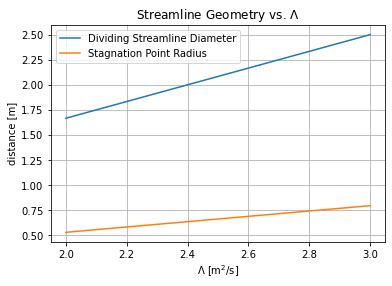

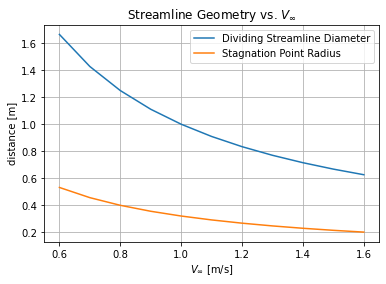

In [3]:
#Define range of values that we will sweep V_inf and lambda
V_inf_range = np.linspace(0.6, 1.6, 11)
source_strength_range = np.linspace(2, 3, 11)

V_inf = 0.6
source_strength = 2

#Solve for the variance with respect to lambda of the DSL radius and stag.point, keeping V_inf constant
dividingSL_Radius_dLambda = source_strength_range/(4*V_inf)
x_stag_dLambda = source_strength_range/(2*np.pi*V_inf)

#Solve for the variance with respect to V_inf of the DSL radius and stag.point, keeping lambda constant
dividingSL_Radius_dV = source_strength/(4*V_inf_range)
x_stag_dV = source_strength/(2*np.pi*V_inf_range)

#Plotting
plt.plot(source_strength_range, 2*dividingSL_Radius_dLambda, label='Dividing Streamline Diameter')
plt.plot(source_strength_range, x_stag_dLambda, label='Stagnation Point Radius')
plt.legend()
plt.title("Streamline Geometry vs. $\Lambda$")
plt.xlabel("$\Lambda$ [m$^2$/s]")
plt.ylabel("distance [m]")
plt.grid()
plt.show()

plt.plot(V_inf_range, 2*dividingSL_Radius_dV, label='Dividing Streamline Diameter')
plt.plot(V_inf_range, x_stag_dV, label='Stagnation Point Radius')
plt.legend()
plt.title("Streamline Geometry vs. $V_\infty$")
plt.xlabel("$V_\infty$ [m/s]")
plt.ylabel("distance [m]")
plt.grid()
plt.show()

Now, we can plot the extremes of each plot. Below is the plot for $\Lambda = 3$ and $V_\infty = 0.6$. The scaling is the same as the original plot and we can clearly see how much wider the Dividing Streamline is. This also comes with a stagnation point further away from the source. This makes sense since the source's strength or volume output was increased which should displace more of the fluid.

Text(-1.9957747154594767, -0.8, 'Stag. Point')

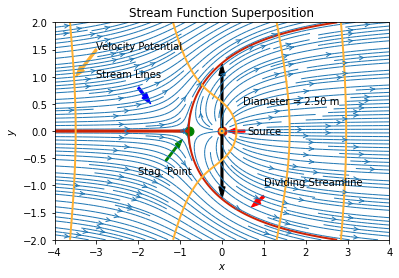

In [4]:
#Repeat the stream plot but with V_inf = 0.6 and Lambda = 3
N = 200
xBounds = [-4, 4]
yBounds = [-2, 2]
x = np.linspace(xBounds[0], xBounds[1], N)
y = np.linspace(yBounds[0], yBounds[1], N)
X, Y = np.meshgrid(x, y)

V_inf = 0.6
source_strength = 3

u_inf, v_inf, psi_inf, phi_inf = get_freestream_values(V_inf, X, Y, N)

u_source, v_source = get_singularity_velocity(source_strength, source_x, source_y, X, Y)
psi_source = get_singularity_streamfunction(source_strength, source_x, source_y, X, Y)
phi_source = get_singularity_velocitypotential(source_strength, source_x, source_y, X, Y)

u_total = u_inf + u_source
v_total = v_inf + v_source
psi_total = psi_inf + psi_source
phi_total = phi_inf + phi_source

x_stag = source_x - source_strength/(2*np.pi*V_inf)
y_stag = source_y

_stag = source_x - source_strength/(2*np.pi*V_inf)
y_stag = source_y

plt.streamplot(X, Y, u_total, v_total, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.arrow(-2, 0.8, 0.3, -0.3, width=0.05, length_includes_head=True, color="b")
plt.text(-3, 1, "Stream Lines")

plt.title("Stream Function Superposition")
plt.xlabel("$x$")
plt.ylabel("$y$")

streamConst = [-source_strength / 2, source_strength / 2]
plt.contour(X, Y, psi_total, levels=streamConst, colors='#CD2305', linewidths=2, linestyles='solid');
plt.arrow(1, -1.2, -0.3, -0.2, width=0.05, length_includes_head=True, color="r")
plt.text(1, -1, "Dividing Streamline")

plt.contour(X, Y, phi_total, levels=[-1.5, -0.3, 1.2, 2.3], colors='#FFB133', linewidths=2, linestyles='solid');
plt.arrow(-3, 1.5, -0.5, -0.5, width=0.05, length_includes_head=True, color="#FFB133")
plt.text(-3, 1.5, "Velocity Potential")

dividingSL_Radius = source_strength/(4*V_inf)
plt.arrow(source_x, source_y, 0, dividingSL_Radius, width=0.05, length_includes_head=True, color="black")
plt.arrow(source_x, source_y, 0, -dividingSL_Radius, width=0.05, length_includes_head=True, color="black")
plt.text(source_x + 0.5, source_y + 0.5, "Diameter = {:.2f} m".format(dividingSL_Radius*2))

plt.scatter(source_x, source_y, color="#CD2305", s=80, marker='o')
plt.arrow(source_x + 0.55, source_y, -0.4, 0, width=0.04, length_includes_head=True, color="red")
plt.text(source_x + 0.6, source_y -0.05, "Source")

plt.scatter(x_stag, y_stag, color='g', s=80, marker='o')
plt.arrow(x_stag - 0.55, y_stag- 0.55, 0.4,  0.4, width=0.04, length_includes_head=True, color="g")
plt.text(x_stag - 1.2, y_stag -0.8, "Stag. Point")

On the other hand, below is the plot for $\Lambda = 2$ and $V_\infty = 1.6$. We can see the opposite of the previous plot, where now we have a narrower Dividing Streamline and a closer stagnation point. Again, this makes sense since the freestream's strength was increased

Text(-1.3989436788648693, -0.8, 'Stag. Point')

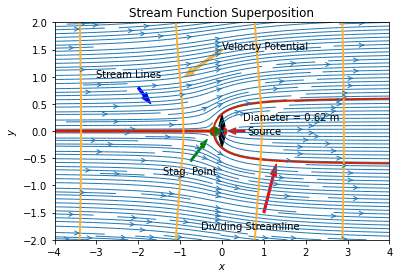

In [5]:
#Repeat the stream plot but with V_inf = 1.6 and Lambda = 2
N = 200
xBounds = [-4, 4]
yBounds = [-2, 2]
x = np.linspace(xBounds[0], xBounds[1], N)
y = np.linspace(yBounds[0], yBounds[1], N)
X, Y = np.meshgrid(x, y)

V_inf = 1.6
source_strength = 2

u_inf, v_inf, psi_inf, phi_inf = get_freestream_values(V_inf, X, Y, N)

u_source, v_source = get_singularity_velocity(source_strength, source_x, source_y, X, Y)
psi_source = get_singularity_streamfunction(source_strength, source_x, source_y, X, Y)
phi_source = get_singularity_velocitypotential(source_strength, source_x, source_y, X, Y)

u_total = u_inf + u_source
v_total = v_inf + v_source
psi_total = psi_inf + psi_source
phi_total = phi_inf + phi_source

x_stag = source_x - source_strength/(2*np.pi*V_inf)
y_stag = source_y

_stag = source_x - source_strength/(2*np.pi*V_inf)
y_stag = source_y

plt.streamplot(X, Y, u_total, v_total, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.arrow(-2, 0.8, 0.3, -0.3, width=0.05, length_includes_head=True, color="b")
plt.text(-3, 1, "Stream Lines")

plt.title("Stream Function Superposition")
plt.xlabel("$x$")
plt.ylabel("$y$")

streamConst = [-source_strength / 2, source_strength / 2]
plt.contour(X, Y, psi_total, levels=streamConst, colors='#CD2305', linewidths=2, linestyles='solid');
plt.arrow(1, -1.5, 0.3, 0.9, width=0.05, length_includes_head=True, color="r")
plt.text(-0.5, -1.8, "Dividing Streamline")

plt.contour(X, Y, phi_total, levels=[-5, -1.5, 1.5, 5], colors='#FFB133', linewidths=2, linestyles='solid');
plt.arrow(source_x, source_y + 1.5, -0.9, -0.5, width=0.05, length_includes_head=True, color="#FFB133")
plt.text(source_x, source_y + 1.5, "Velocity Potential")

dividingSL_Radius = source_strength/(4*V_inf)
plt.arrow(source_x, source_y, 0, dividingSL_Radius, width=0.05, length_includes_head=True, color="black")
plt.arrow(source_x, source_y, 0, -dividingSL_Radius, width=0.05, length_includes_head=True, color="black")
plt.text(source_x + 0.5, source_y + 0.2, "Diameter = {:.2f} m".format(dividingSL_Radius*2))

plt.scatter(source_x, source_y, color="#CD2305", s=80, marker='o')
plt.arrow(source_x + 0.55, source_y, -0.4, 0, width=0.04, length_includes_head=True, color="red")
plt.text(source_x + 0.6, source_y -0.05, "Source")

plt.scatter(x_stag, y_stag, color='g', s=80, marker='o')
plt.arrow(x_stag - 0.55, y_stag- 0.55, 0.4,  0.4, width=0.04, length_includes_head=True, color="g")
plt.text(x_stag - 1.2, y_stag -0.8, "Stag. Point")

### Problem 2
As we know, the dividing streamline seperates the inner and outer flow regions such that there is no flow between them. This can be seen as a solid surface that is defined by the dividing streamline which is useful since we can define flow over an arbitrary object, so long as we can define it with the elementary stream elements which will be sources and sinks in our case. We want to form a symmetric airfoil using several sources and sinks. For this problem, I chose to mimic the first 0.75% of a 3ft chord NACA 0010 airfoil.

The airfoil was plotted using the same function I used for Project 1, and part of the code was reused and modified for the comparison to the contour plot.

This process took a lot of trial-and-error and some intuition of how sources and sinks affect the shape of the oval. As seen below, the airfoil is pretty close to the actual airfoil with a maximum error (in the first 75%) of 0.0178 feet or 0.2136 inches. The airfoil was plotted over the streamline and shows how well the approxmimation first. A stretched airfoil and a contour plot is also plotted to show how close the two geometries are.

I only realized after making the sources and sinks closely match the airfoil that the requirements weren't that strict and we actually need three trials. Two previous iterations of my source and sink configurations are also shown below. As we can see, the method isn't actually very good since it relies mostly on trial-and-error. If an analytical expression could be derived then maybe this method would be more viable. This method is also only applies for symmetric airfoils, since any variation in the y-values of each singularity will lead to us solving for $\psi$ everytime we change or add a singularity

This method could probably be made better by creating a very fine line of singularities and finding some solution to solving the problem through math. Another approach may be to use some iterative methods where a fine mesh of points is created and an initial guess is made that loosely follows the airfoil and the program chooses and slightly adjusts the initial guess until the geometry is matched. An iterative method would probably be computationally expensive since it would have to generate the contours and compare values over maybe thousands of iterations to get good results. Then again, there is also the panel method but we are not concerning ourselves with that (yet).

In [6]:
#Function to draw a Symmetric NACA
def SymmetricNACA(c, tau):
    #Calculate t as a percentage
    t = tau/100
    #Make a vector x from 0 to 1 with 201 points
    x_norm = np.linspace(0, 1, 216)
    #Calculates z_t/c (thickness on either side of the camper line which is flat for symmetric airfoils)
    z_t_norm = (t/0.2)*(0.2969*((x_norm)**(1/2)) - 0.1260*(x_norm) - 0.3516*((x_norm)**2) + 0.2843*((x_norm)**3) - 0.1015*((x_norm)**4))
    #Returns x and z_t as a tuple after redimensionalizing with c
    return x_norm*c, z_t_norm*c

#Create a function since the plot will be made three times and no markers need to be edited between plots
def StreamplotProblem2(x_list, y_list, strength_list):

    #Define airfoil parameters and create the airfoil points
    c = 3
    tau = 10

    NACAx, NACAz = SymmetricNACA(c, tau)

    #Create a mesh grid of X and Y values
    N = 200
    xBounds = [-1, 4]
    yBounds = [-1.5, 1.5]
    x = np.linspace(xBounds[0], xBounds[1], N)
    y = np.linspace(yBounds[0], yBounds[1], N)
    X, Y = np.meshgrid(x, y)

    #Define a source strength and find u, v and psi values
    V_inf = 2

    u_inf, v_inf, psi_inf, phi_inf = get_freestream_values(V_inf, X, Y, N)

    #Initialize u, v and psi total as the freestream
    u_total = u_inf
    v_total = v_inf
    psi_total = psi_inf

    #Print the sum of source strengths to make sure it is zero
    print("Sum of source/sink strengths: {}".format(sum(strength_list)))

    #Iterate through all x and y coordinates and the associated strengths
    for x, y, strength in zip(x_list, y_list, strength_list):
        #Use the previous functions to get u, v and psi at the X and Y meshgrid
        u, v = get_singularity_velocity(strength, x, y, X, Y)
        psi = get_singularity_streamfunction(strength, x, y, X, Y)

        #Increment u, v and psi total using the calculated values
        u_total += u
        v_total += v
        psi_total += psi

    #Plot a streamplot using u and v values
    plt.streamplot(X, Y, u_total, v_total, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

    plt.title("Stream Function Superposition: NACA 0010 approximation")

    #Plot the sources/sinks on the stream plot
    plt.scatter(x_list, y_list, color="k", s=80, marker='x')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.axis('equal')

    #Plot a contour line of the psi = 0 stream function (DSL for all singularities in line)
    CS = plt.contour(X, Y, psi_total, levels=[0.0], colors='#CD2305', linewidths=2, linestyles='solid');

    #Overlay the plot of the NACA 0010 airfoil
    plt.plot(NACAx, NACAz, label='NACA 0010', color='b')
    plt.plot(NACAx, -NACAz, label='NACA 0010', color='b')

    #Derive a class path from the contour
    paths = CS.collections[0].get_paths()
    quiet = True
    ipath = 0
    tol= 10e-3

    if not quiet:
            if len(paths) < 2:
                print('Only one dividing streamline path')
            else:
                print('Multiple paths in dividing streamline, select the best one')

    #Choose a path and separate the x and y values
    path =  paths[ipath]     
    x_contour = path.vertices[:, 0]
    y_contour = path.vertices[:, 1]

    #Convert x and y to dataframe
    df = pd.DataFrame({'x':x_contour, 'y':y_contour})
    #Extract only the relevant values of x (0 to 2.25)
    df = df[(df.x >= 0.) & (df.x <= 2.25)]
    #Remove values near zero
    df = df[(df.y < -tol) | (df.y > tol)]
    df['y'] = abs(df['y'])
    #Sort and remove duplicates
    df = df.sort_values(['x', 'y'], ascending=[True, True])
    df = df.drop_duplicates(subset='x', keep="last")

    #Plot on a separate plot a stretched version of the contour and airfoil (to see the differences better)
    plt.figure(figsize=[6,6])
    plt.title("Contour Line vs. NACA 0010 Airfoil")
    plt.xlabel("$c$")
    plt.ylabel("$z$")
    plt.plot(NACAx, NACAz, label='NACA 0010')
    plt.plot(df['x'], df['y'], label='3/4 Approximation')
    plt.legend(loc='best')
    plt.show()

    #Use the airfoil thickness equation and the extracted x values to get expected y-values of the airfoil. Calculate error
    t = tau/100
    NACAz_comparison = c*(t/0.2)*(0.2969*((df['x']/c)**(1/2)) - 0.1260*(df['x']/c) - 0.3516*((df['x']/c)**2) + 0.2843*((df['x']/c)**3) - 0.1015*((df['x']/c)**4))
    print("Absolute maximum deviation of the approximation to the actual airfoil (in first 75%): {} feet".format(np.max(np.abs(df['y'] - NACAz_comparison))))
    print("Arbitrary Error Metric: {}".format(sum(np.abs(df['y'] - NACAz_comparison))/(len(df['x']))))

Sum of source/sink strengths: -2.220446049250313e-16


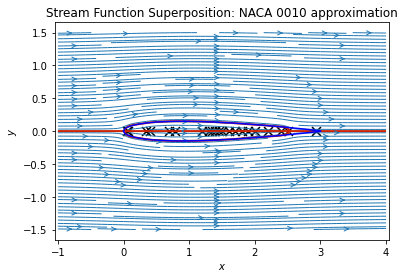

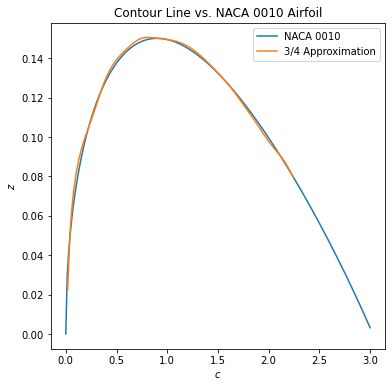

Absolute maximum deviation of the approximation to the actual airfoil (in first 75%): 0.01141609426367695 feet
Arbitrary Error Metric: 0.0014849355265584268


In [7]:
#Airfoil estimation when I thought the lines had to closely match
x_list = [0.06, 0.065, 0.35, 0.4, 0.7, 0.78,
            1.2, 1.3, 1.35, 1.4, 1.45, 1.5, 1.6, 1.7, 1.8, 1.9,
            2, 2.2, 2.4, 2.5, 2.93]
y_list = np.zeros(len(x_list))
strength_list = [1, -0.53, 0.21, -0.02, 0.1, -0.09, 
            -0.02, -0.02, -0.02, -0.01, -0.02, -0.01, -0.03, -0.05, -0.02, -0.02
            -0.03, -0.03, -0.07, -0.01, -0.31]

StreamplotProblem2(x_list, y_list, strength_list)

Sum of source/sink strengths: 0.20000000000000007


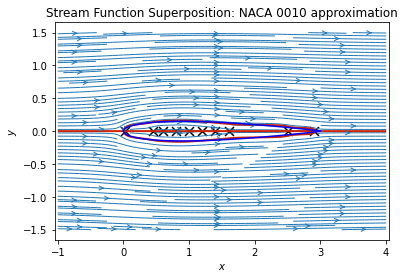

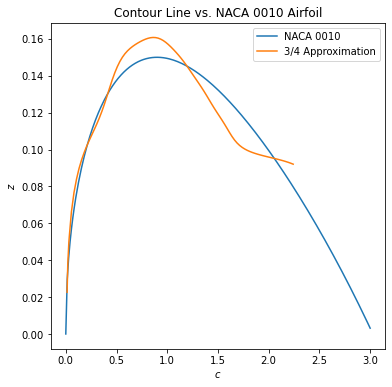

Absolute maximum deviation of the approximation to the actual airfoil (in first 75%): 0.01787446122431524 feet
Arbitrary Error Metric: 0.00785796538022967


In [8]:
#One quick trials made after I saw we had to make 3 trials total
x_list = [0.02, 0.45, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 2.5, 2.9]
y_list = np.zeros(len(x_list))
strength_list = [0.7, 0.3, -0.05, 0.05, -0.1, -0.1, -0.1, -0.1, -0.2, -0.2]

StreamplotProblem2(x_list, y_list, strength_list)

Sum of source/sink strengths: 0.0


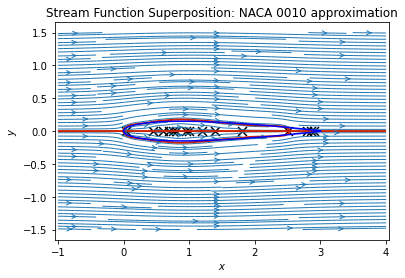

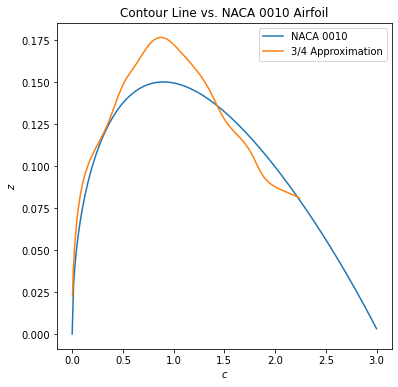

Absolute maximum deviation of the approximation to the actual airfoil (in first 75%): 0.026525073849578612 feet
Arbitrary Error Metric: 0.011351929141176467


In [9]:
#Another trial made for the third trial
x_list = [0.04, 0.45, 0.6, 0.7, 0.75, 0.8, 0.95, 1, 1.2, 1.4, 1.8, 2.5, 2.8, 2.85, 2.9]
y_list = np.zeros(len(x_list))
strength_list = [0.5, 0.3, -0.2, 0.4, -0.15, 0.1, -0.1, -0.1, -0.05, -0.05 -0.15, -0.15, -0.35]

StreamplotProblem2(x_list, y_list, strength_list)

### Problem 3
In this section, we are going to look at some aerodynamics problems

#### 3.1: Center of Pressure
In this problem, we have the lift, drag and moment (about $\frac{c}{4}$) coefficients of a NACA 2412 airfoil over several angles of attack ($\alpha$) and we want to find the center of pressure for each datapoint. Based on Anderson's Equation 1.20 (page 32), we get the following relationship:

$$M_{LE}' = -N'x_{cp} \longrightarrow x_{cp} = -\frac{M_{LE}'}{N'} = -\frac{C_{m, LE}}{C_n}$$

Even though the equation is given in leading edge moment and normal force per unit span, we can generalize this to use the coefficients since the coefficients contain the same information but are normalized to certain parameters. Since we weren't given the normal force coefficient, we can work backwards from our $C_l$ and $C_d$ with our $\alpha$:

$$C_l = C_n \cos\alpha - C_a \sin\alpha \longrightarrow \frac{C_n \cos\alpha  - C_l }{\sin\alpha}=  C_a$$
$$C_d = C_n \sin\alpha + C_a \cos\alpha \longrightarrow \frac{C_d - C_n \sin\alpha}{\cos\alpha} = C_a $$

We have two equations and two unknowns, equating both gives us the following:

$$ \frac{C_n \cos\alpha  - C_l }{\sin\alpha} = \frac{C_d - C_n \sin\alpha}{\cos\alpha} \longrightarrow C_n \cos^2\alpha  - C_l\cos\alpha  = C_d\sin\alpha - C_n \sin^2\alpha \longrightarrow C_n (\cos^2\alpha + \sin^2\alpha) = C_d\sin\alpha + C_l\cos\alpha \longrightarrow C_n = C_d\sin\alpha + C_l\cos\alpha$$

Now we have $C_n$, but our $C_m$ is with respect to the quarter chord. To convert the $C_m$, we can use a variant of Equation 1.22, using $C_n$ instead of $C_l$:

$$C_{m,LE} = -\frac{c}{4}C_n + C_{m, c/4}$$

The issue is, we don't actually have $c$. Luckily, we are only interested in the position of the center of pressure with respect to $c$ which means that we can choose $c = 1$ for unit chord length. Our final equation is as follows:

$$\frac{x_{cp}}{c}=-\frac{-\frac{c}{4}(C_d\sin\alpha + C_l\cos\alpha) + C_{m, c/4}}{C_d\sin\alpha + C_l\cos\alpha}$$

The code that calculates and plots $\frac{x_{cp}}{c}$ is below. As we can see, the value for $\frac{x_{cp}}{c}$ decreases rapidly as $\alpha$ increases, where the center of pressure initially starts past the airfoil. As the angle of attack increases, we can actually see the center of pressure settle towards the front of the airfoil which is somewhat in accordance to the $\frac{c}{4}$ approximation made for a low angle of attack.

The large initial $x_{cp}$ value is also somewhat within expectations since Anderson (pg. 33) mentioned that "the center of pressure moves to infinity" as the normal forces tend towards zero. The negative angle of attack has a $C_l$ value of 0.05 which is getting rather close to zero and the $C_d$ term will also (slightly) reduce $C_n$ as well. We can see this relationship from the equations above. We can also see that for an increasing normal force, the center of pressure will tend towards zero (as force goes to infinity) which explains the inversely proportional trend we are seeing on the plot.

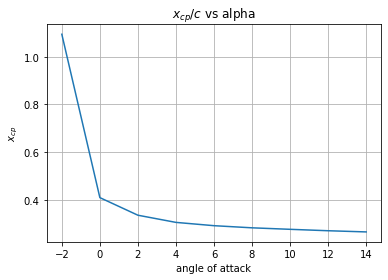

In [10]:
#Input the tabulated values
alpha = [-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0]
C_l = [0.05, 0.25, 0.44, 0.64, 0.85, 1.08, 1.26, 1.43, 1.56]
C_d = [0.006, 0.006, 0.006, 0.007, 0.0075, 0.0092, 0.0115, 0.0150, 0.0186]
C_m_qc = [-0.042, -0.04, -0.038, -0.036, -0.036, -0.036, -0.034, -0.03, -0.025]

#Initialize x_cp_non
x_cp_non = np.zeros(len(alpha))

#Iterate over the datapoints
for i in range(len(alpha)):
    #Calculate C_n, C_m,LE and x_cp_non
    C_n = C_d[i]*np.sin(alpha[i]*(np.pi/180)) + C_l[i]*np.cos(alpha[i]*(np.pi/180))
    C_m_le = -0.25*C_n+C_m_qc[i]
    x_cp_non[i] = -C_m_le/C_n

#Plot the output
plt.plot(alpha, x_cp_non)
plt.title("$x_{cp}/c$ vs alpha")
plt.xlabel("angle of attack")
plt.ylabel("$x_{cp}$")
plt.grid()
plt.show()

#### 3.2: Dynamic Similarity
We are given the properties of two geometrically similar airfoils as shown below:

Smaller Airfoil (1): $T_\infty = 199 \text{K}, \rho_\infty = 1.23 \frac{\text{kg}}{\text{m}^3}, V_\infty = 141 \frac{\text{m}}{\text{s}}, c = c_1$

Larger Airfoil (2): $T_\infty = 400 \text{K}, \rho_\infty = 1.739 \frac{\text{kg}}{\text{m}^3}, V_\infty = 200 \frac{\text{m}}{\text{s}}, c = 2c_1$

We are also making the assumption that $\mu, a \propto \sqrt{T}$. In order to maintain dynamic similarity, we want the bodies to be geometrically similar with equal Mach and Reynolds numbers. The larger airfoil has an approximately doubled temperature which means that the $a$ and $\mu$ are increased by a factor of approximately $\sqrt{\frac{400}{199}}$. Calculating the Mach numbers, we get the following:

$$Ma_{\infty, 1} = \frac{V_{\infty, 1}}{a_{\infty,1}} = \frac{141}{a_{\infty,1}}$$

$$Ma_{\infty, 2} = \frac{V_{\infty, 2}}{a_{\infty,2}} = \frac{200}{\sqrt{2.01}a_{\infty,1}} = \frac{141.069}{a_{\infty,1}}$$

As we can see, the two Mach numbers are approximately equal. This is expected since $V_{\infty,2} \approx 141\sqrt{2}$. Now we can look at the Reynold's number:

$$Re_1 = \frac{\rho_{\infty, 1}V_{\infty, 1}d_1}{\mu_{\infty,1}} = \frac{(1.23)(141)c_1}{\mu_{\infty,1}} = \frac{(173.43)c_1}{\mu_{\infty,1}}$$

$$Re_2 = \frac{\rho_{\infty, 2}V_{\infty, 2}d_2}{\mu_{\infty,2}} = \frac{(1.739)(200)c_2}{\mu_{\infty,2}} = \frac{(347.8)2c_1}{\sqrt{2.01}\mu_{\infty,1}} = \frac{(490.63)c_1}{\mu_{\infty,1}}$$

Since the Reynolds numbers are not equivalent, we cannot say that these flows are dynamically similar. The calculations are shown below:

In [13]:
#Normalized w.r.t a_1 and mu_1

#Smaller Airfoil
Ma_1 = 141
Re_1 = 1.23*141*1

#Larger Airfoil
Ma_2 = 200/np.sqrt(400/199)
Re_2 = (1.739*200*2)/np.sqrt(400/199)

print("Mach Numbers: Smaller = {}, Larger = {}".format(Ma_1, Ma_2))
print("Reynolds Numbers: Smaller = {}, Larger = {}".format(Re_1, Re_2))

Mach Numbers: Smaller = 141, Larger = 141.06735979665885
Reynolds Numbers: Smaller = 173.43, Larger = 490.6322773727795


#### 3.3: Similarity Parameters
Now we are considering a jet that is flying at an altitude of 10km under the given parameters:

Full-scale (1): $T_\infty = 223 \text{K}, \rho_\infty = 0.414 \frac{\text{kg}}{\text{m}^3}, V_\infty = 200 \frac{\text{m}}{\text{s}}, c = c_1$

We want to model this with a one-fifth scale model (2) with a wind tunnel pressure of 1 atm. We can write the Mach number equations as shown below:

$$Ma_{\infty, 1} = \frac{V_{\infty, 1}}{a_{\infty,1}} = \frac{200}{a_{\infty,1}}$$

$$Ma_{\infty, 2} = \frac{V_{\infty, 2}}{a_{\infty,2}} = \frac{V_{\infty, 2}}{\sqrt{\frac{T_{\infty, 2}}{223}}a_{\infty,1}}$$

Equating these gives us the following:

$$200 = \frac{V_{\infty, 2}}{\sqrt{\frac{T_{\infty, 2}}{223}}} \longrightarrow V_{\infty, 2} = 200\sqrt{\frac{T_{\infty, 2}}{223}}$$

This gives us an expression for $T_{\infty, 2}$ in terms of $V_{\infty, 2}$. We also have the Reynolds numbers which are expressed below:

$$Re_1 = \frac{\rho_{\infty, 1}V_{\infty, 1}d_1}{\mu_{\infty,1}} = \frac{(0.414)(200)c_1}{\mu_{\infty,1}} = \frac{(82.8)c_1}{\mu_{\infty,1}}$$

$$Re_2 = \frac{\rho_{\infty, 2}V_{\infty, 2}d_2}{\mu_{\infty,2}} = \frac{\rho_{\infty, 2}V_{\infty, 2}c_2}{\mu_{\infty,2}} = \frac{\rho_{\infty, 2}V_{\infty, 2}\frac{1}{5}c_1}{\sqrt{\frac{T_{\infty, 2}}{223}}\mu_{\infty,1}}$$

Equating these gives us the following: 

$$(82.8)5 = \frac{\rho_{\infty, 2}V_{\infty, 2}}{\sqrt{\frac{T_{\infty, 2}}{223}}} \longrightarrow 414\sqrt{\frac{T_{\infty, 2}}{223}} = \rho_{\infty, 2}V_{\infty, 2}$$

This gives us an expression for $\rho_{\infty, 2}$ in terms of $T_{\infty, 2}$ and $V_{\infty, 2}$. Since we have three unknowns, we actually need a third equation to solve for velocity and temperature. Since our $a$ equation uses the ideal gas constant $R$, we need these $R$ values to be equal which can be enforced through the ideal gas equation:

$$PV = mRT$$

$$\frac{P_1}{T_1\frac{m_1}{V_1}} = R = \frac{P_2}{T_2\frac{m_2}{V_2}} \longrightarrow \frac{P_1}{T_1\rho_1} = \frac{P_2}{T_2\rho_2}$$

We know that $P_2$ = 1 atm but $P_1$ isn't explicitly given to us. We can derive this from the altitude and taking the pressure at standard atmosphere. The pressure at an altitude of 10km at standard atmosphere is approximately 26436 Pa (Yechout, 2003) which is about 0.26090303 atm. Filling out all our known information, we get the following:

$$\frac{0.26090303}{223(0.414)} = \frac{1}{T_2\rho_2} \longrightarrow \frac{353.855}{T_2} = \rho_2$$

This gives us three total equations for our three unknowns. We can substitute in each expression of $T_{\infty, 2}$ back into the Reynolds number equation to get the following:

$$414\sqrt{\frac{T_{\infty, 2}}{223}} = \rho_{\infty, 2}V_{\infty, 2} \longrightarrow 414\sqrt{\frac{T_{\infty, 2}}{223}} = \frac{353.855}{T_{\infty, 2}}(200\sqrt{\frac{T_{\infty, 2}}{223}}) \longrightarrow 414 = \frac{353.855}{T_{\infty, 2}}(200) \longrightarrow T_{\infty, 2} = \frac{353.855(200)}{414} = 170.944 \text{K}$$

Now that we have our temperature, we can derive the other two parameters:

$$V_{\infty, 2} = 200\sqrt{\frac{T_{\infty, 2}}{223}} = 200\sqrt{\frac{170.944}{223}} = 175.107 \frac{\text{m}}{\text{s}}$$

$$\rho_{\infty,2} = \frac{353.855}{T_2} = \frac{353.855}{170.944} = 2.0700 \frac{\text{kg}}{\text{m}^3}$$

The calculations are shown below:


In [22]:
T_1 = 223 #K
rho_1 = 0.414 #kg/m^3
V_1 = 200 #m/s
c_1 = 1 #unit
P_1 = 0.26090303 #atm

c_2 = 1/5 #unit
P_2 = 1 #atm

T_2 = (((P_2*T_1*rho_1)/P_1)*V_1)/((V_1*rho_1*c_1)/(c_2))

print("Temperature: {} Kelvin".format(T_2))

V_2 = V_1*np.sqrt(T_2/T_1)

print("Velocity: {} m/s".format(V_2))

rho_2 = ((P_2*T_1*rho_1)/(P_1*T_2))

print("Density: {} kg/m^3".format(rho_2))



Temperature: 170.94473759082064 Kelvin
Velocity: 175.10777595568737 m/s
Density: 2.07 kg/m^3


#### 3.4: Lift Coefficients
##### Boeing 787
A Boeing 787 has a wing area of about 4,058 square feet and a maximum takeoff weight of approximately 561,500 lbf. The cruising speed is given as Mach 0.85.

##### Boeing 787 Cruising at 42,000 feet
At 42,000 feet in standard atmoshpere, the density is given by 0.0005315 slugs per cubic feet and the speed of sound is 968.1 feet per second. Since cruising speed is Mach 0.85, our velocity is given by the following:

$$V_{plane} = V_\infty = a_\infty Ma_\infty = 968.1(0.85) = 822.855 \frac{\text{ft}}{\text{s}}$$

Since we are cruising, our lift force is equal to our weight, which is 560,000lbf for the maximum gross weight. From this, we can get our lift coefficient by plugging in values to the lift coefficient equation:

$$C_L = \frac{561500}{\frac{1}{2}0.0005315(822.855)^2(4058)} = 0.76892$$

##### Boeing 787 Landing in San Francisco
The Boeing 787-9 has a FAA Reference Code of D-V and an approach speed of 153 knots, approximately 258.235 feet per second. The San Francisco International Airport has an altitude of 13 feet. For our purposes, we will assume that the 13 feet is negligible and is similar to conditions at sea level. At standard atmosphere sea level, we have a density of about 0.002377 slugs per cubic feet. Since the problem asked for the $C_L$ at maximum gross weight, the maximum landing weight will be used which is 425,000 lbf. We can simply plug these values into the $C_L$ equation as we did above:

$$C_L = \frac{425000}{\frac{1}{2}0.002377(258.235)^2(4058)} = 1.32114$$

##### Boeing 787 Landing in Denver
This is similar to the previous problem, but with a different airport which may include different altitudes and different air properties. The Denver International Airport has an altitude of 5430 feet. Using linear interpolation between 5000 and 6000 feet, the density of air at this altitude is approximately 0.002021741 slugs per cubic feet. We can simply plug these values into the $C_L$ equation as we did above:

$$C_L = \frac{425000}{\frac{1}{2}0.002021741(258.235)^2(4058)} = 1.55329$$

##### Cessna 152 Cruising at 5,000 feet.
The Cessna 152 is a much smaller airplane, with a wing area of about 160 square feet and a maximum takeoff weight of 1670 lbf. The Cessna handbook gave a cruise speed of 103 KTAS (Knots True Airspeed) which is about 173.844 feet per second. At 5,000 feet, the standard atmospheric density is 0.0020481 slugs per cubic feet. We can simply plug these values into the $C_L$ equation:

$$C_L = \frac{1670}{\frac{1}{2}0.0020481(173.844)^2(160)} = 0.337175$$

In [27]:
def CalculateCL(L, rho, V, S):
    return (L/(0.5*rho*(V**2)*S))

#Boeing 787
MTW = 561500 #lbf
MLW = 425000 #lbf
S = 4058 #sqft

Ma_cruise = 0.85
a_42k = 968.1 #ft/s
rho_42k = 0.0005315 #slugs per cubic feet
V_cruise = Ma_cruise*a_42k #ft/s

rho_0ft = 0.002377
rho_5430ft = 0.0020481 + (5430 - 5000)*(0.0019868 - 0.0020481)/(6000 - 5000)
V_approach = 153*1.688 #ft/s

print("Boeing 787 C_L, Cruising at 42k ft = {}".format(CalculateCL(MTW, rho_42k, V_cruise, S)))
print("Boeing 787 C_L, Landing at SFO = {}".format(CalculateCL(MLW, rho_0ft, V_approach, S)))
print("Boeing 787 C_L, Landing at DIA = {}".format(CalculateCL(MLW, rho_5430ft, V_approach, S)))

#Cessna 152
MTW = 1670 #lbf
S = 160 #sqft
V_cruise = 103*1.688 #ft/s
rho_5k = 0.0020481

print("Cessna 152 C_L, Cruising at 5k ft = {}".format(CalculateCL(MTW, rho_5k, V_cruise, S)))

Boeing 787 C_L, Cruising at 42k ft = 0.7689288450591741
Boeing 787 C_L, Landing at SFO = 1.3211433864954563
Boeing 787 C_L, Landing at DIA = 1.5532938342249083
Cessna 152 C_L, Cruising at 5k ft = 0.33717548633525285


# References
Anderson, J. D. Jr. (2007). Fundamentals of Aerodynamics.

Yechout, T. R. (2003). Introduction to Airfraft Flight Mechanics.

Boeing 787 Specifications: https://modernairliners.com/boeing-787-dreamliner/boeing-787-dreamliner-specs/

Boeing 787 Landing Speed: https://www.boeing.com/assets/pdf/commercial/airports/faqs/arcandapproachspeeds.pdf

Cessna 152 Specifications: https://longislandaviators.com/wp-content/uploads/2018/08/1978-Pilots-Operating-Handbook-Cessna-152.pdf

Cessna 152 Specifications: https://www.purdueaviationllc.com/storage/app/media/Data%20Sheets/C152%20Data%20Sheet.pdf